<a href="https://colab.research.google.com/github/ksushrut/CoinClassifier/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import torch
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import random
from PIL import Image, ImageEnhance
from tqdm import tqdm
import numpy as np
import pandas as pd


In [58]:
folder_path = '/content/drive/MyDrive/CoinImages'

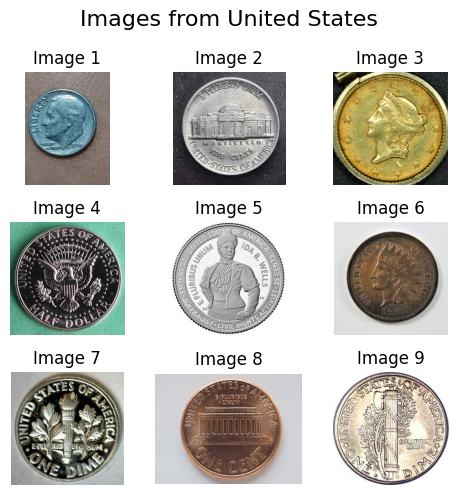

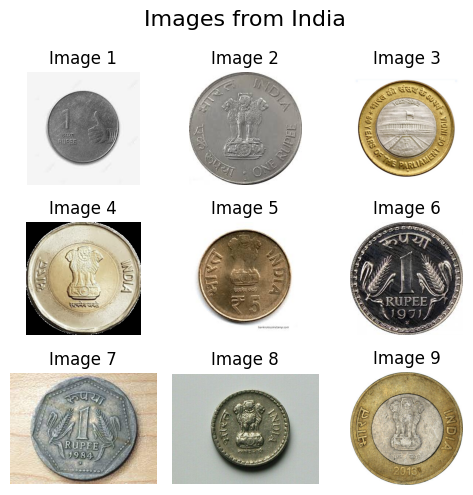

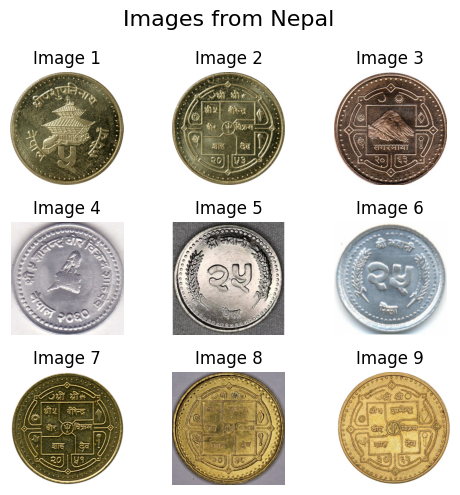

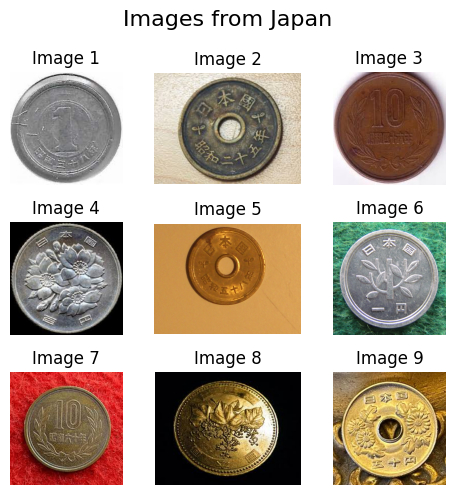

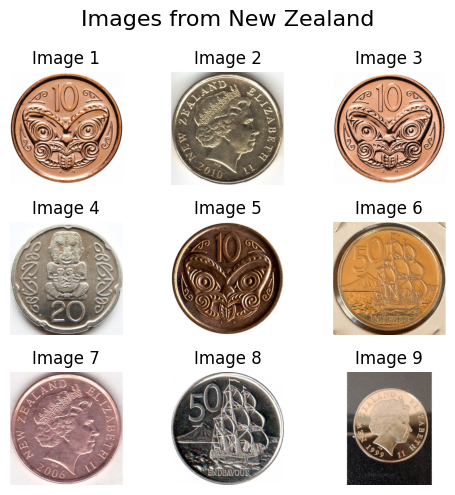

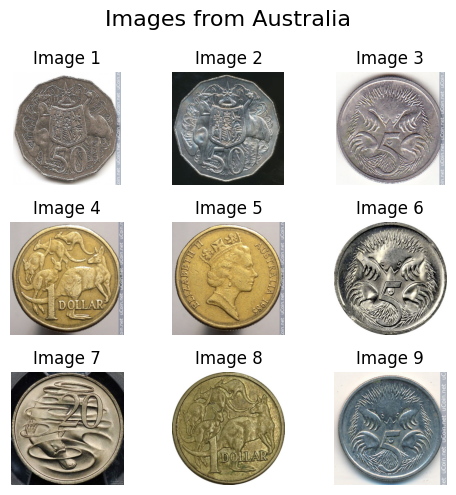

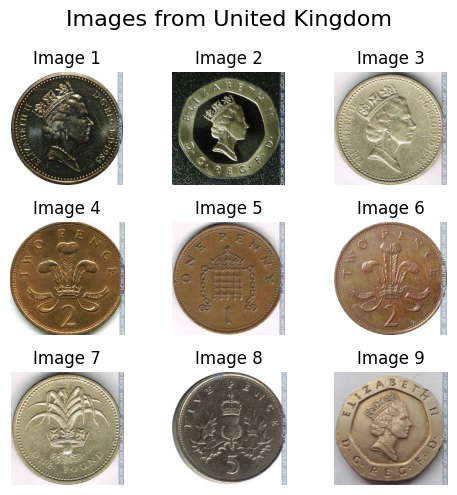

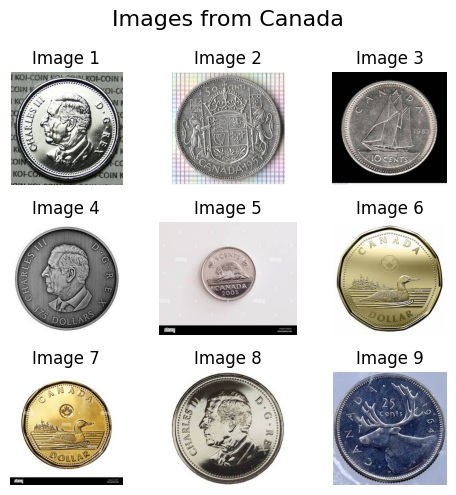

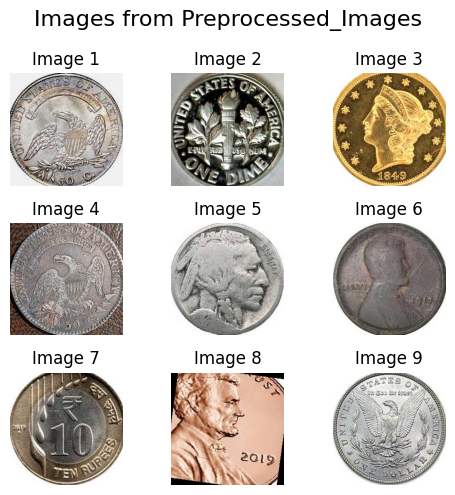

No images found for Preprocessed_images


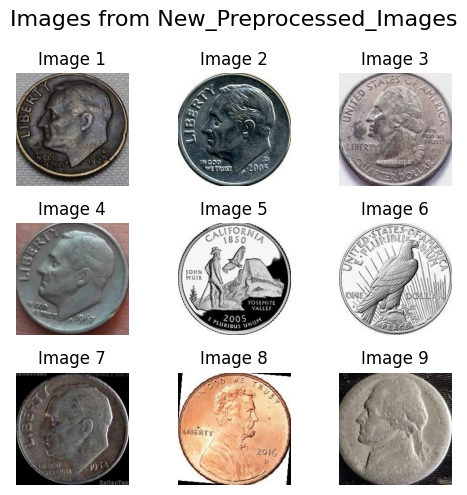

In [59]:
#Prerequisite for this cell: Right click on CoinImages in drive. Organize and then add short cut to My Drive
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

country_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Loop through each country folder
for country in country_folders:
    country_path = os.path.join(folder_path, country)

    # Collect all images from this country's subfolders
    image_files = []
    for root, _, files in os.walk(country_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))

    # If no images found, skip this country
    if len(image_files) == 0:
        print(f"No images found for {country}")
        continue

    # Select 9 random images (or fewer if less than 9 exist)
    random_images = random.sample(image_files, min(9, len(image_files)))

    # Display images in a 3x3 grid
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))
    fig.suptitle(f"Images from {country}", fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(random_images):
            img_path = random_images[i]
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img)
            ax.set_title(f"Image {i+1}")
        ax.axis("off")  # Hide axes if no image

    plt.tight_layout()
    plt.show()

In [60]:
# def analyze_image_folders(root_folder):
#     """
#     Analyzes image folders, counts subfolders and images, and presents the data in a Pandas DataFrame.
#     """

#     data = []
#     for country in os.listdir(root_folder):
#         country_path = os.path.join(root_folder, country)
#         if os.path.isdir(country_path):
#             subfolder_count = 0
#             image_count = 0
#             for root, dirs, files in os.walk(country_path):
#                 subfolder_count += len(dirs)  # Count subfolders within each country
#                 for file in files:
#                     if file.lower().endswith((".jpg", ".jpeg", ".png")):
#                         image_count += 1
#             data.append([country, subfolder_count, image_count])

#     df = pd.DataFrame(data, columns=["Country", "Subfolder Count", "Image Count"])
#     return df

# image_data_df = analyze_image_folders(folder_path)
# image_data_df

In [61]:

# import pandas as pd

# def analyze_image_folders(root_folder):
#     """
#     Analyzes image folders, counts images within each subfolder, and presents the data in a Pandas DataFrame.
#     """
#     data = []
#     for country in os.listdir(root_folder):
#         country_path = os.path.join(root_folder, country)
#         if os.path.isdir(country_path):
#             for subfolder in os.listdir(country_path):
#                 subfolder_path = os.path.join(country_path, subfolder)
#                 if os.path.isdir(subfolder_path):
#                     image_count = 0
#                     for file in os.listdir(subfolder_path):
#                         if file.lower().endswith((".jpg", ".jpeg", ".png")):
#                             image_count += 1
#                     data.append([country, subfolder, image_count])
#     df = pd.DataFrame(data, columns=["Country", "Denomination", "Image Count"])
#     return df

# image_data_df = analyze_image_folders(folder_path)
# image_data_df


In [62]:


# def image_info_dataframe(root_folder):
#     data = []
#     for country in os.listdir(root_folder):
#         country_path = os.path.join(root_folder, country)
#         if os.path.isdir(country_path):
#             for subfolder in os.listdir(country_path):
#                 subfolder_path = os.path.join(country_path, subfolder)
#                 if os.path.isdir(subfolder_path):
#                     for image_file in os.listdir(subfolder_path):
#                         if image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
#                             image_path = os.path.join(subfolder_path, image_file)
#                             try:
#                                 img = Image.open(image_path)
#                                 width, height = img.size
#                                 data.append([image_path, country, subfolder, width, height])
#                             except Exception as e:
#                                 print(f"Error processing {image_path}: {e}")
#     df = pd.DataFrame(data, columns=["Image Path", "Main Folder", "Subfolder", "Width", "Height"])
#     return df

# image_df = image_info_dataframe(folder_path)
# image_df


In [63]:
"""
Make a CSV file for all the info of the dataset.
"""

def make_csv_dataset(folder_path, excluded_folders):
  """
  Make a CSV file for all the info of the dataset.

  Arguments:
  folder_path [str]: the path of the folder to the dataset
  excluded_folders [list]: list of folders [str] to be excluded

  Returns:
  df [dataframe]: all the information related to a image files
  ["country", "denomination", "image_path", "width", "height"]

  """

  image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

  country_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
  country_folders = [country for country in country_folders if country not in excluded_folders]

  data = []
  # Loop through each country folder
  for country in country_folders:
      country_path = os.path.join(folder_path, country)

      # Collect all images from this country's subfolders
      image_files = []
      for root, _, files in os.walk(country_path):
          for file in files:
              if file.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                  img = Image.open(os.path.join(root, file))
                  width, height = img.size
                  data.append([country, root.split('/')[-1], file, width, height])
                except:
                  pass

  df = pd.DataFrame(data, columns=["country", "denomination", "image_path", "width", "height"])
  return df




In [64]:
folder_path = "/content/drive/My Drive/CoinImages"
excluded_folders = ['Preprocessed_Images', 'Only_Preprocessed_Images', 'New_Preprocessed_Images']

df = make_csv_dataset(folder_path, excluded_folders)

In [65]:
df[df['country'] == 'Nepal']['denomination'].value_counts()

,count
denomination,
2 Nepali Rupee,34
1 Nepali Rupee,34
25 Nepali Paisa,32
1 Nepali Paisa,32
5 Nepali Rupee,32


In [66]:

df = pd.DataFrame(data, columns=["country", "denomination", "image_path", "Width", "Height"])
df

,country,denomination,image_path,Width,Height
0,United States,USD 5¢,1h.jpeg,225,225
1,United States,USD 5¢,1t.jpeg,225,225
2,United States,USD 5¢,2t.jpeg,224,225
3,United States,USD 5¢,2h.jpeg,225,225
4,United States,USD 5¢,3h.jpeg,225,225
...,...,...,...,...,...
2173,New_Preprocessed_Images,USD 1$,aug_tail_1.jpg,224,224
2174,New_Preprocessed_Images,USD 1$,aug_tail_2.jpg,224,224
2175,New_Preprocessed_Images,USD 1$,aug_tail_3.jpg,224,224
2176,New_Preprocessed_Images,USD 1$,aug_tail_4.jpg,224,224


In [67]:
df['denomination'].value_counts()

,count
denomination,
USD 5¢,132
USD 1¢,128
USD 25¢,126
USD 10¢,126
USD 1$,125
USD 50¢,80
INR 5Rs,79
INR 10Rs,76
GBP 1 Pound,60


In [68]:
df.to_csv('coins_info.csv', index=False,)